<a href="https://colab.research.google.com/github/PrashantS87/Time_Series_Forecasting/blob/main/TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from openpyxl import load_workbook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
workbook = load_workbook(filename='/content/drive/MyDrive/TSF_Forecasting/Data.xlsx', read_only=True)
worksheet_names = workbook.sheetnames
worksheet_names

['Past Data Till July 24', 'Future Actual Data Aug 24']

In [4]:
df = pd.read_excel('/content/drive/MyDrive/TSF_Forecasting/Data.xlsx', sheet_name=worksheet_names[0], index_col='Date Time',parse_dates=['Date Time'])

In [5]:
df.columns

Index(['GEO', 'Categories_New', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [6]:
df = df.drop(columns= ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7'])

In [7]:
df.head(2)

,GEO,Categories_New
Date Time,,
2021-07-02,EMEA,Activity_1
2021-07-02,AMS,Activity_1


In [8]:
import pandas as pd
df_date_counts = df.groupby(df.index.date).size().reset_index(name='Volume')

In [9]:
df_date_counts.head()

,index,Volume
0,2021-04-05,17
1,2021-04-06,34
2,2021-04-07,51
3,2021-04-08,40
4,2021-04-09,29


In [10]:
df_unique_dates = pd.merge(df, df_date_counts, left_on=df.index.date, right_on='index', how='left')
df_unique_dates = df_unique_dates.drop_duplicates(subset=['index'])
df_unique_dates = df_unique_dates[['index', 'Volume']]
df_1 = df_unique_dates.reset_index(drop=True)
print(df_1.head())




        index  Volume
0  2021-07-02      55
1  2021-07-01      61
2  2021-06-30      64
3  2021-06-29      71
4  2021-06-28      51


## Linear Regression with Time Series

The linear regression algorithm learns how to make a weighted sum from its input features. For two features, we would have:

**target = weight_1 * feature_1 + weight_2 * feature_2 + bias**

Time-step features¶
There are two kinds of features unique to time series: time-step features and lag features.

Time-step features are features we can derive directly from the time index. The most basic time-step feature is the time dummy, which counts off time steps in the series from beginning to end.


In [11]:
import numpy as np

In [12]:
df_1['Time'] = np.arange(len(df_1.index))
df_1.head()

,index,Volume,Time
0,2021-07-02,55,0
1,2021-07-01,61,1
2,2021-06-30,64,2
3,2021-06-29,71,3
4,2021-06-28,51,4


In [13]:
len(df_1)

914

In [14]:
df_1 = df_1[800:]

In [20]:
df_1.tail()

,index,Volume,Time
909,2024-07-27,7,909
910,2024-07-28,2,910
911,2024-07-29,51,911
912,2024-07-30,76,912
913,2024-07-31,68,913


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

<ipython-input-17-81a8e1eaff76>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [18]:
%config InlineBackend.figure_format = 'retina'

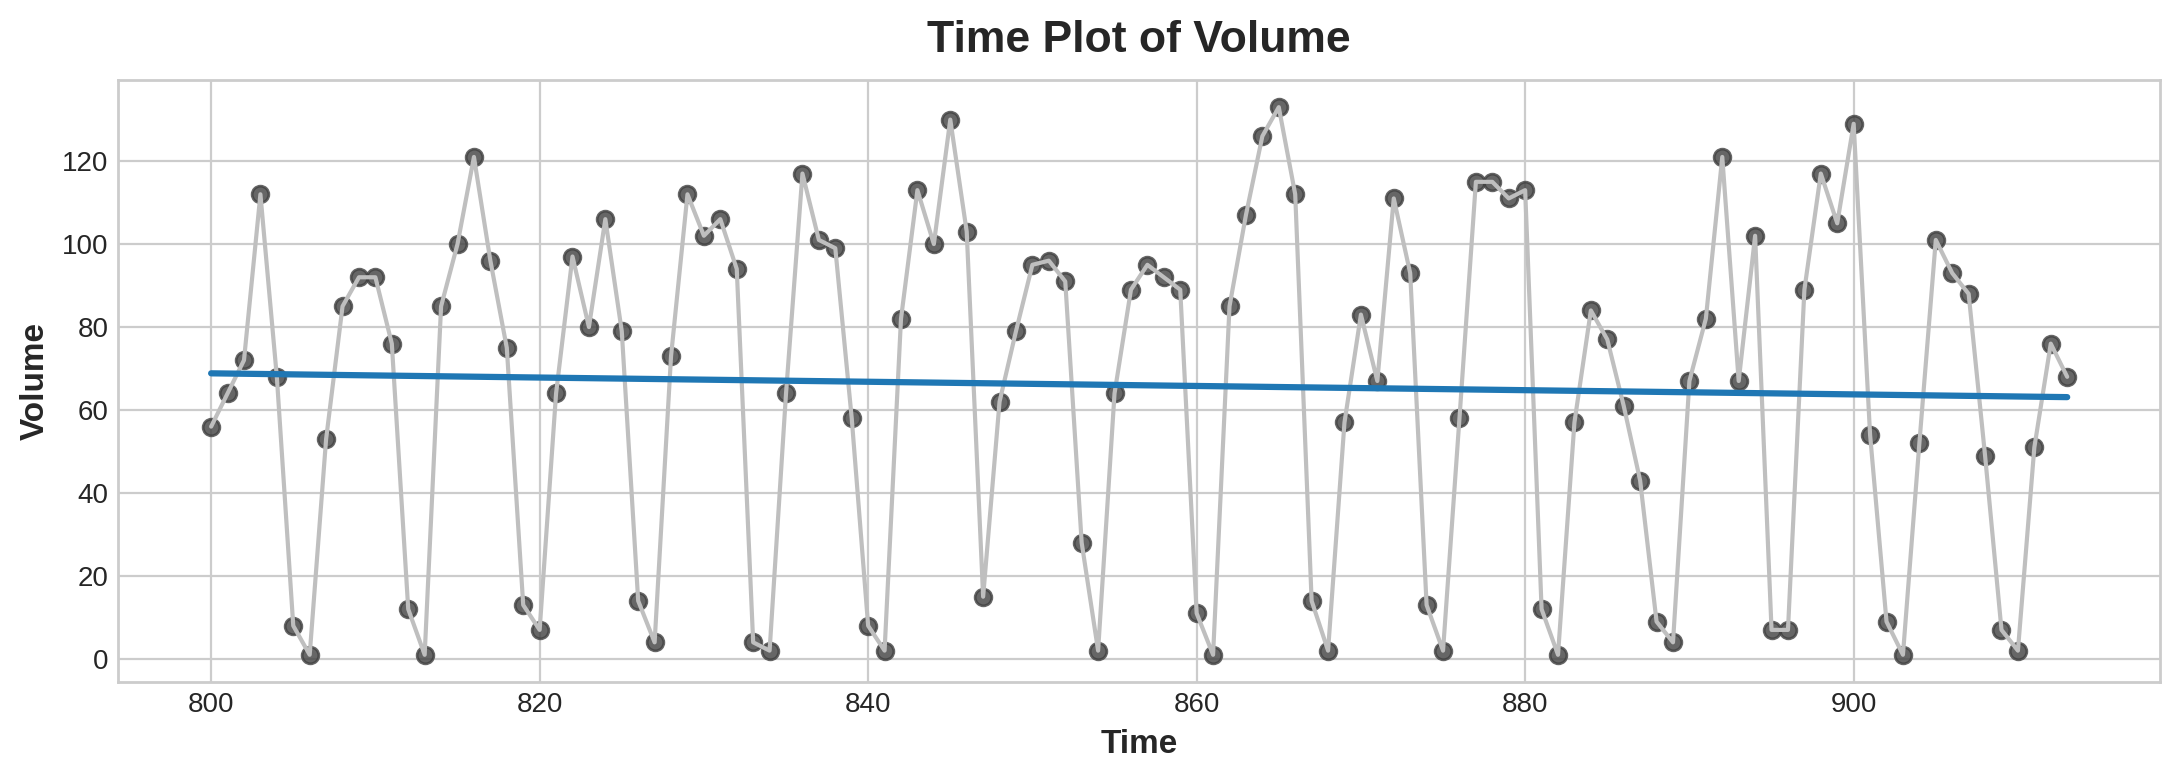

In [19]:
fig, ax = plt.subplots()
ax.plot('Time', 'Volume', data=df_1, color='0.75')
ax = sns.regplot(x='Time', y='Volume', data=df_1, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Volume');

In [ ]:
# prompt: what above graph tells me?

# The graph shows a positive linear relationship between time and volume.
# This indicates that the volume of something (likely sales or traffic) is increasing over time.
# The regression line shows the general trend of the volume increase.
# The scatter plot shows the actual volume at each point in time.
# The deviations of the actual volume from the regression line can give you an insight
# into the variability and possible seasonality in the data.


In [21]:
df_1['Lag_1'] = df_1['Volume'].shift(1)
df_1 = df_1.reindex(columns=['index','Volume', 'Lag_1', 'Time'])

df_1.head()

,index,Volume,Lag_1,Time
800,2024-04-08,56,NaN,800
801,2024-04-09,64,56.0,801
802,2024-04-10,72,64.0,802
803,2024-04-11,112,72.0,803
804,2024-04-12,68,112.0,804


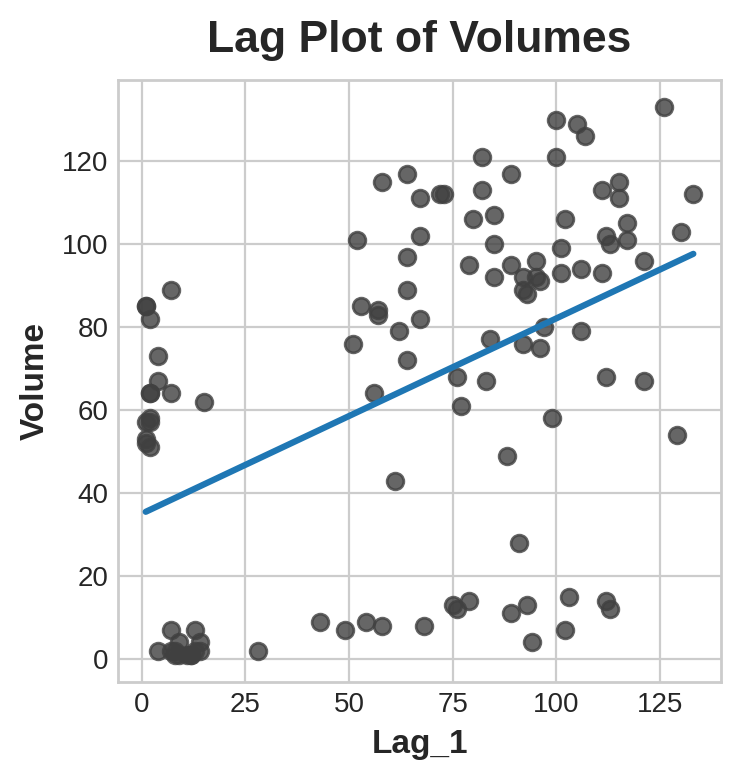

In [22]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Volume', data=df_1, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Volumes');

In [23]:
df_1.head()

,index,Volume,Lag_1,Time
800,2024-04-08,56,NaN,800
801,2024-04-09,64,56.0,801
802,2024-04-10,72,64.0,802
803,2024-04-11,112,72.0,803
804,2024-04-12,68,112.0,804


In [ ]:
# prompt: what above graph tells me?

# The Lag Plot of Volumes shows the relationship between the current volume and the volume from the previous time step (Lag_1).
#
# Here's what the graph tells us:
#
# 1. Positive Correlation: The plot shows a generally positive correlation between 'Volume' and 'Lag_1'.
#    This suggests that when the volume was high in the previous time step, it tends to be high in the current time step as well, and vice versa.
# 2. Linear Relationship: The points appear to follow a roughly linear trend. This indicates that there's a linear relationship
#    between the current volume and the lagged volume.
# 3. Possible Autocorrelation: The existence of a strong correlation between the current and lagged volume indicates possible autocorrelation
#    in the time series data. Autocorrelation means that the values in the time series are related to previous values in the series.
# 4. Forecasting Potential: The positive correlation suggests that past volumes can be used to predict future volumes. We can use a linear
#    regression model to predict future volumes based on lagged volumes.
#
# In essence, the Lag plot helps us understand how the time series data behaves in relation to its previous values.
# This information is crucial for building time series forecasting models.


In [24]:
from sklearn.linear_model import LinearRegression

In [ ]:
df_1.head()

,index,Volume,Lag_1,Time
0,2021-07-02,55,NaN,0
1,2021-07-01,61,55.0,1
2,2021-06-30,64,61.0,2
3,2021-06-29,71,64.0,3
4,2021-06-28,51,71.0,4


In [25]:
X = df_1.loc[:,['Time']]
y = df_1.loc[:,'Volume']

In [26]:
model = LinearRegression()

In [27]:
model.fit(X,y)

LinearRegression()

In [28]:
y_pred = pd.Series(model.predict(X), index = X.index)

In [ ]:
# y_pred

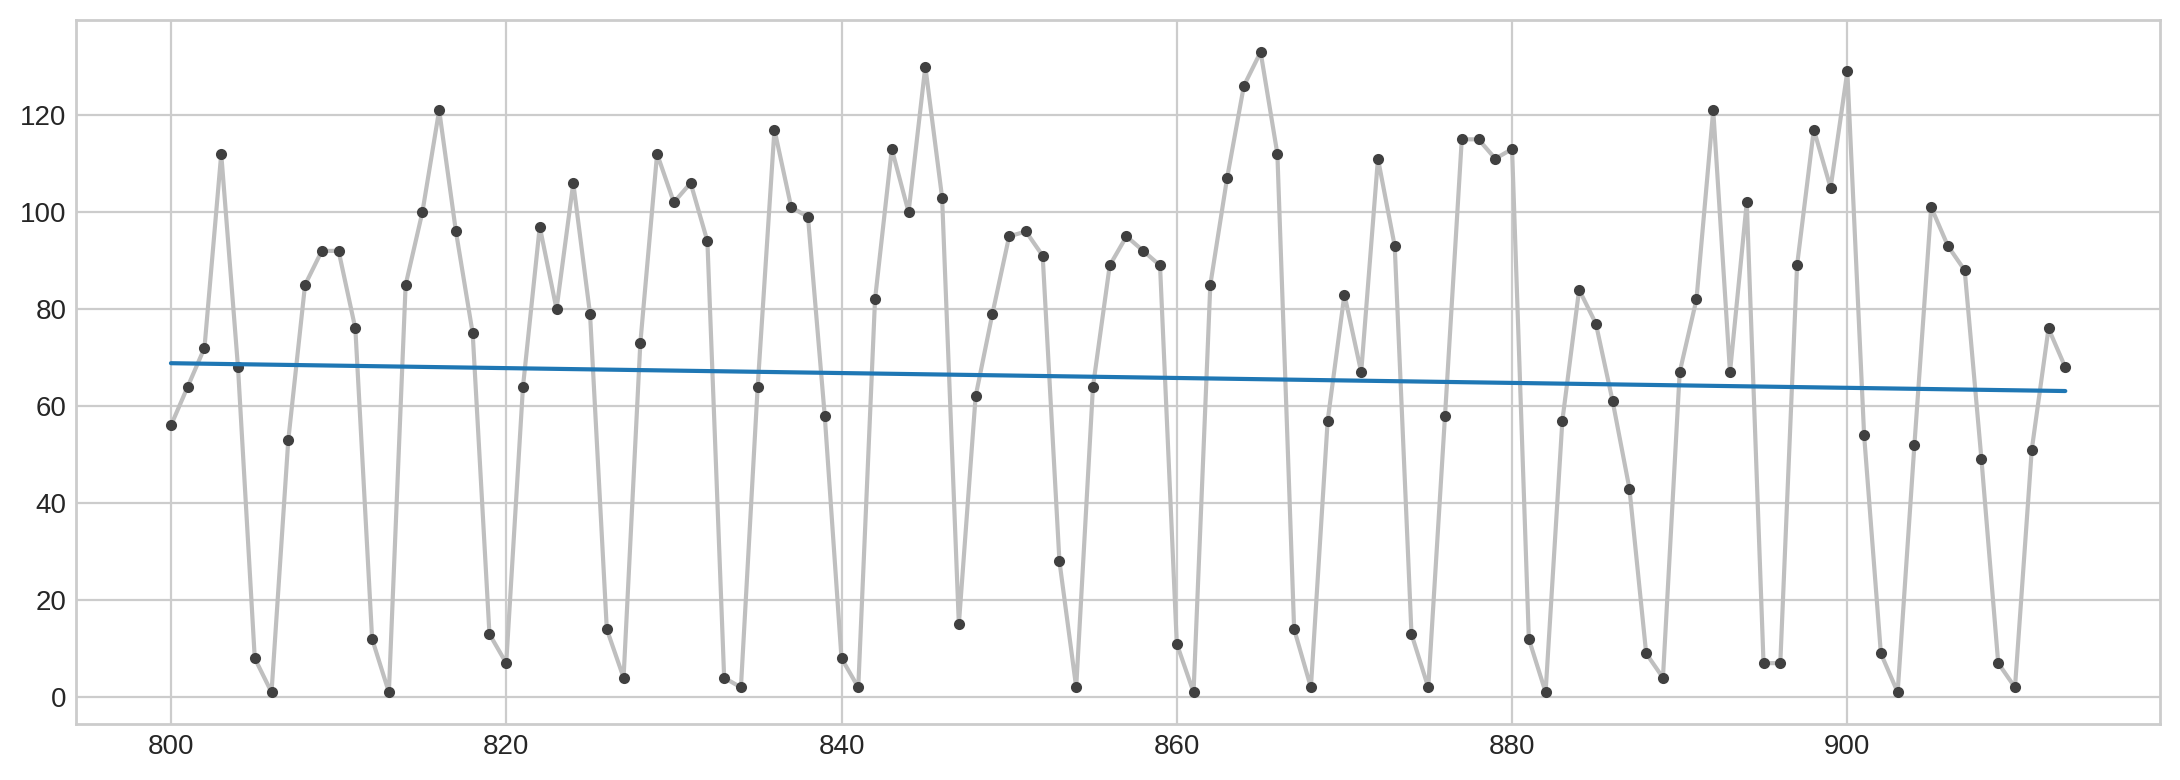

In [29]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [30]:
# prompt: how do i see predicted value against specific future date

import pandas as pd
from datetime import datetime, timedelta

# Assuming you want to predict the volume for a specific future date
future_date = datetime(2024, 8, 30)  # Replace with your desired future date

# Calculate the time difference between the last date in your dataset and the future date
last_date = df_1['index'].max()
print(last_date)
last_date = datetime.combine(last_date, datetime.min.time())
time_diff = (future_date - last_date).days

# Create a new DataFrame with the future date and the corresponding time value
future_df = pd.DataFrame({'index': [future_date], 'Time': [df_1['Time'].max() + time_diff]})
future_df = future_df.set_index('index')

# Predict the volume for the future date
future_volume = model.predict(future_df[['Time']])

# Print the predicted volume
print(f"Predicted Volume for {future_date}: {future_volume[0]}")


2024-07-31
Predicted Volume for 2024-08-30 00:00:00: 61.582207731718675


In [33]:
df_1

,index,Volume,Lag_1,Time
800,2024-04-08,56,NaN,800
801,2024-04-09,64,56.0,801
802,2024-04-10,72,64.0,802
803,2024-04-11,112,72.0,803
804,2024-04-12,68,112.0,804
...,...,...,...,...
909,2024-07-27,7,49.0,909
910,2024-07-28,2,7.0,910
911,2024-07-29,51,2.0,911
912,2024-07-30,76,51.0,912


In [34]:
# prompt: wtite a code to add future dates in df_1 in 'index' column and predict future volume in 'Volume' column. create new dataframe index from previous

import pandas as pd
# Assuming you want to predict the volume for a specific number of future days
num_future_days = 30  # Replace with the number of future days you want to predict

# Get the last date in the DataFrame
last_date = df_1['index'].max()
last_date = datetime.combine(last_date, datetime.min.time())

# Create a list of future dates
future_dates = [last_date + timedelta(days=i) for i in range(1, num_future_days + 1)]

# Create a new DataFrame with the future dates and corresponding time values
future_df = pd.DataFrame({'index': future_dates, 'Time': range(df_1['Time'].max() + 1, df_1['Time'].max() + num_future_days + 1)})
future_df = future_df.set_index('index')

# Predict the volume for the future dates
future_volume = model.predict(future_df[['Time']])

# Create a new DataFrame with the predicted volume
future_predictions = pd.DataFrame({'Volume': future_volume}, index=future_df.index)


# Concatenate the original DataFrame with the future predictions
df_with_predictions = pd.concat([df_1, future_predictions])

# Fill NaN values in Lag_1 column using forward fill
df_with_predictions['Lag_1'] = df_with_predictions['Volume'].shift(1)

# Reset the index to get a new sequential index
df_with_predictions = df_with_predictions.reset_index()

print(df_with_predictions.tail(35))



                 level_0       index     Volume      Lag_1   Time
109                  909  2024-07-27   7.000000  49.000000  909.0
110                  910  2024-07-28   2.000000   7.000000  910.0
111                  911  2024-07-29  51.000000   2.000000  911.0
112                  912  2024-07-30  76.000000  51.000000  912.0
113                  913  2024-07-31  68.000000  76.000000  913.0
114  2024-08-01 00:00:00         NaN  63.054495  68.000000    NaN
115  2024-08-02 00:00:00         NaN  63.003726  63.054495    NaN
116  2024-08-03 00:00:00         NaN  62.952958  63.003726    NaN
117  2024-08-04 00:00:00         NaN  62.902189  62.952958    NaN
118  2024-08-05 00:00:00         NaN  62.851421  62.902189    NaN
119  2024-08-06 00:00:00         NaN  62.800652  62.851421    NaN
120  2024-08-07 00:00:00         NaN  62.749884  62.800652    NaN
121  2024-08-08 00:00:00         NaN  62.699115  62.749884    NaN
122  2024-08-09 00:00:00         NaN  62.648347  62.699115    NaN
123  2024-

In [35]:
# prompt: replace NaN values in 'index' column with dates from 'level_0' column from row index 914

df_with_predictions['index'] = df_with_predictions['index'].fillna(method='ffill')


<ipython-input-35-f7880dace903>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_with_predictions['index'] = df_with_predictions['index'].fillna(method='ffill')


In [36]:
df_with_predictions

,level_0,index,Volume,Lag_1,Time
0,800,2024-04-08,56.000000,NaN,800.0
1,801,2024-04-09,64.000000,56.000000,801.0
2,802,2024-04-10,72.000000,64.000000,802.0
3,803,2024-04-11,112.000000,72.000000,803.0
4,804,2024-04-12,68.000000,112.000000,804.0
...,...,...,...,...,...
139,2024-08-26 00:00:00,2024-07-31,61.785282,61.836050,NaN
140,2024-08-27 00:00:00,2024-07-31,61.734513,61.785282,NaN
141,2024-08-28 00:00:00,2024-07-31,61.683745,61.734513,NaN
142,2024-08-29 00:00:00,2024-07-31,61.632976,61.683745,NaN


In [37]:
df_with_predictions[['index', 'Volume']]

,index,Volume
0,2024-04-08,56.000000
1,2024-04-09,64.000000
2,2024-04-10,72.000000
3,2024-04-11,112.000000
4,2024-04-12,68.000000
...,...,...
139,2024-07-31,61.785282
140,2024-07-31,61.734513
141,2024-07-31,61.683745
142,2024-07-31,61.632976


In [38]:
# prompt: display last 60 rows

print(df_with_predictions.tail(60))


                 level_0       index      Volume       Lag_1   Time
84                   884  2024-07-02   84.000000   57.000000  884.0
85                   885  2024-07-03   77.000000   84.000000  885.0
86                   886  2024-07-04   61.000000   77.000000  886.0
87                   887  2024-07-05   43.000000   61.000000  887.0
88                   888  2024-07-06    9.000000   43.000000  888.0
89                   889  2024-07-07    4.000000    9.000000  889.0
90                   890  2024-07-08   67.000000    4.000000  890.0
91                   891  2024-07-09   82.000000   67.000000  891.0
92                   892  2024-07-10  121.000000   82.000000  892.0
93                   893  2024-07-11   67.000000  121.000000  893.0
94                   894  2024-07-12  102.000000   67.000000  894.0
95                   895  2024-07-13    7.000000  102.000000  895.0
96                   896  2024-07-14    7.000000    7.000000  896.0
97                   897  2024-07-15   89.000000

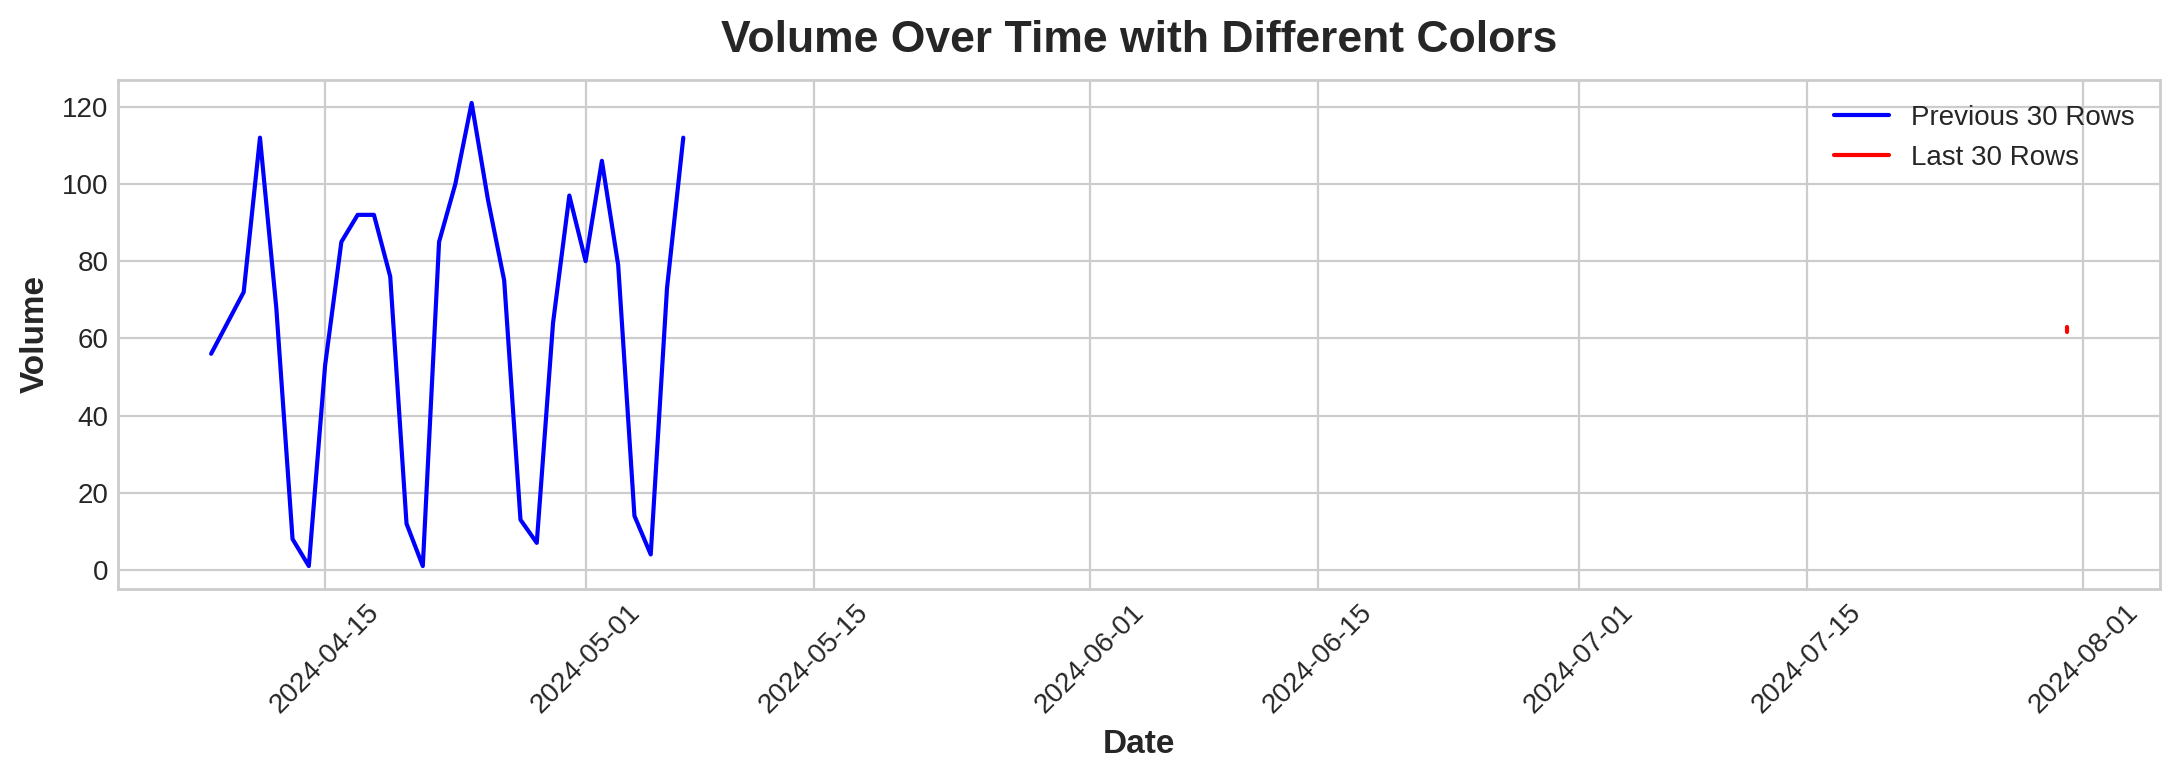

In [39]:
# prompt: show  last 30 rows in  different color and previous 30 rows in different color

import matplotlib.pyplot as plt

# Assuming df_with_predictions is your DataFrame

# Plot the first 30 rows in one color
plt.plot(df_with_predictions['index'][:30], df_with_predictions['Volume'][:30], label='Previous 30 Rows', color='blue')

# Plot the last 30 rows in a different color
plt.plot(df_with_predictions['index'][-30:], df_with_predictions['Volume'][-30:], label='Last 30 Rows', color='red')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Over Time with Different Colors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()
